In [1]:
import pickle

# Load the augmented images and labels from the file
with open('../../local_data/data_useable_6.pickle', 'rb') as f:
    augmented_images, augmented_labels = pickle.load(f)

In [2]:
augmented_images.shape, augmented_labels.shape

((2200, 512, 512, 3), (2200, 2))

In [3]:
import tensorflow as tf
import numpy as np

augmented_images = np.array(augmented_images, dtype=np.float32)
augmented_labels = np.array(augmented_labels, dtype=np.int32)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)

In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1760, 512, 512, 3), (1760, 2), (440, 512, 512, 3), (440, 2))

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Normalization, Flatten
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')

base_model.trainable = False

x = base_model.output
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)

x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Normalization()(x)
x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

/var/folders/qx/nn7p1qjs7xg_z1q9j7km_bv80000gn/T/ipykernel_2082/1369170771.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(512, 512, 3), include_top=False, weights='imagenet')


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint
callbacks = [ModelCheckpoint(filepath='../../models/pre_model_2_3.keras', monitor='val_loss', mode='min', save_best_only=True)]

history = model.fit(
  X_train,
  y_train, 
  epochs=20, 
  validation_data=(X_val, y_val),
  callbacks=callbacks
  )

Epoch 1/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6666 - loss: 2.8043 - val_accuracy: 0.9182 - val_loss: 0.2283
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9387 - loss: 0.1651 - val_accuracy: 0.9682 - val_loss: 0.0807
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9727 - val_loss: 0.0816
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9975 - loss: 0.0123 - val_accuracy: 0.9773 - val_loss: 0.0456
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9903 - loss: 0.0273 - val_accuracy: 0.9591 - val_loss: 0.1546
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9737 - loss: 0.1410 - val_accuracy: 0.9705 - val_loss: 0.1346
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9879 - loss: 0.0419 - val_accuracy: 0.9614 - val_loss: 0.1088
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9875 - loss: 0.0376 - val_accuracy: 0.9841 - val_loss:

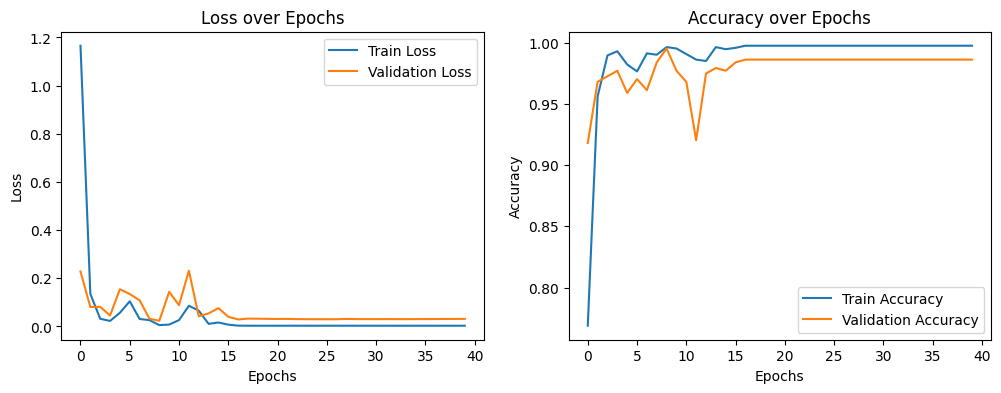

In [8]:
# Optionally, plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

In [9]:
model.save('../../models/pre_model_6_1_40_epochs.h5')
